## Import Library

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [1]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

## Create Conv Relu BatchNormalization Block

In [2]:
def conv_relu_batchnorm(x, filters, kernel_size):
    x = layers.Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu',
               padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    return x

## Create Layers Concatenation Block

In [3]:
def layer_concate(tensor,filters):
    x=conv_relu_batchnorm(tensor,filters,kernel_size=3)
    x=layers.Concatenate()([x,tensor])
    return x

## Define Model Input

In [4]:
inputs=layers.Input(shape=(224,224,3))

## Define Model Architecture

In [5]:
total_class=6

In [6]:
x=conv_relu_batchnorm(inputs,filters=32,kernel_size=3)
x=layers.MaxPool2D(pool_size=(2,2))(x)
x=layer_concate(x,filters=64)
x=layers.MaxPool2D(pool_size=(3,3))(x)

In [7]:
x=conv_relu_batchnorm(x,filters=128,kernel_size=3)
x=layers.MaxPool2D(pool_size=(3,3))(x)
x=layer_concate(x,filters=256)
x=layers.MaxPool2D(pool_size=(3,3))(x)

In [8]:
x=layers.Dropout(0.2)(x)
x=layers.Flatten()(x)
x=layers.Dense(256,activation='relu')(x)

## Define Output Layer 

In [9]:
output=layers.Dense(total_class,activation='softmax')(x)

## Create Hybrid CNN Model

In [10]:
model=keras.Model(inputs,output,name='HybridCNN')

In [11]:
model.summary()

Model: "HybridCNN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 224, 224, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 112, 112, 32) 0           batch_normalization[0][0]        
__________________________________________________________________________________________

## Plot Model

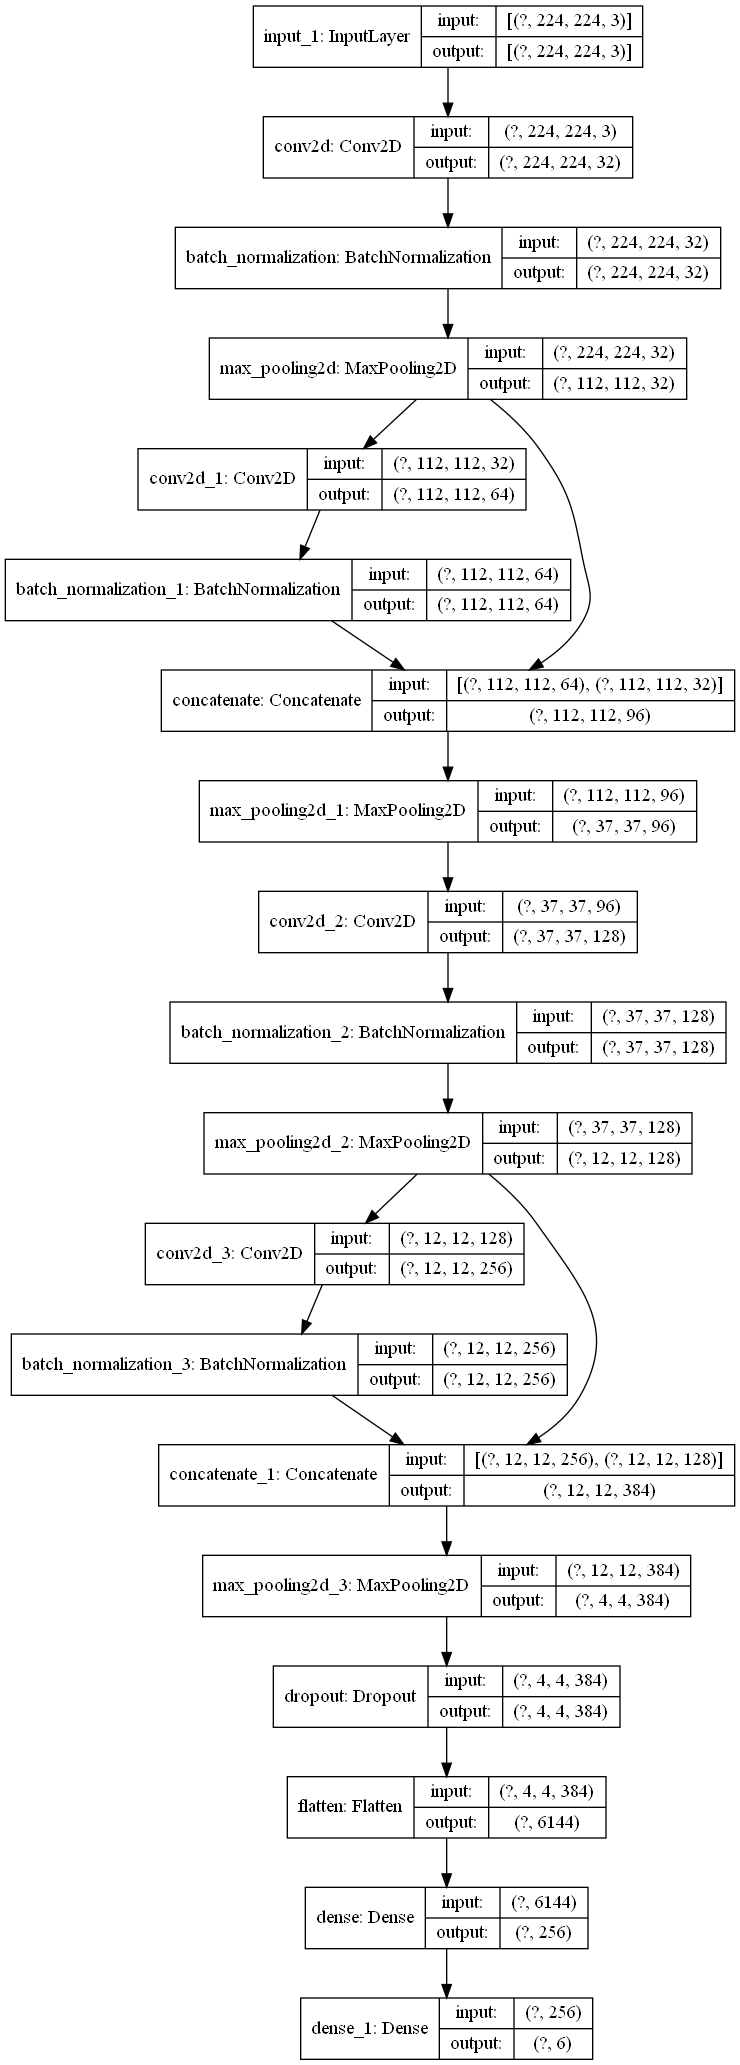

In [12]:
image_name='HybridGraphCNN.png'
keras.utils.plot_model(model,show_shapes=True,to_file=image_name)

## Visualize with Visual Keras

In [13]:
import visualkeras

In [14]:
visualkeras.graph_view(model).show()
visualkeras.graph_view(model,to_file='Graph_Hybrid_cnn_architecture.png')
visualkeras.graph_view(model,to_file='Graph_Hybird_cnn_architecture.png').show()

Using TensorFlow backend.


## Legend

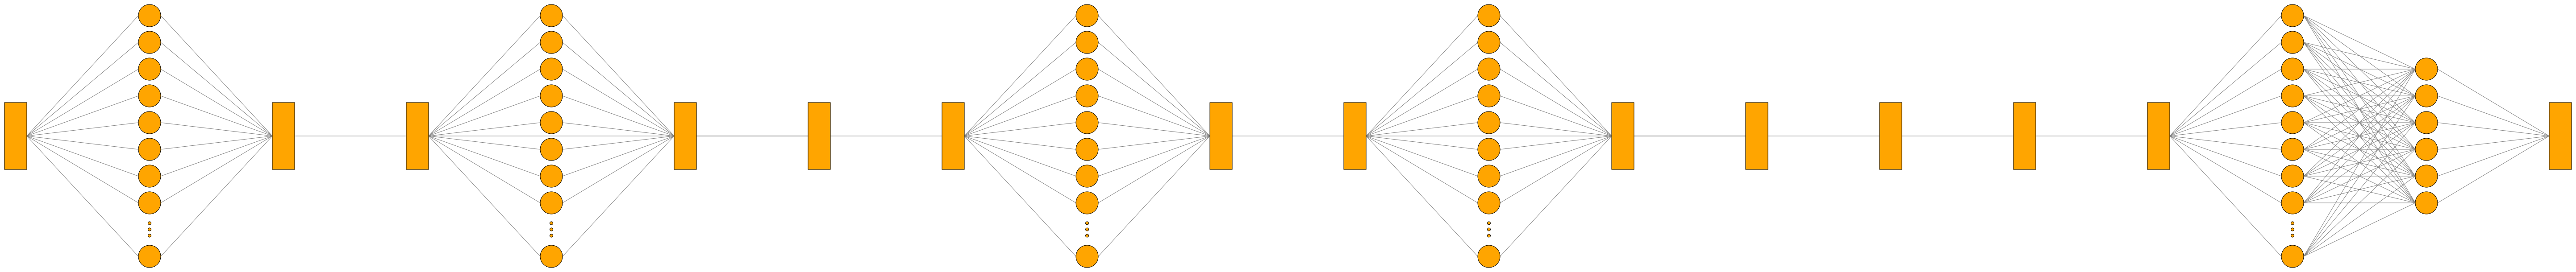

In [18]:
from PIL import ImageFont
font=ImageFont.truetype('arial.ttf',32)
visualkeras.graph_view(model)

## Flat Style

In [19]:
visualkeras.graph_view(model,
                         to_file='Graph_hybrid_flat_cnn.png',
                     )

TypeError: graph_view() got an unexpected keyword argument 'draw_volume'

## Spacing and logic grouping

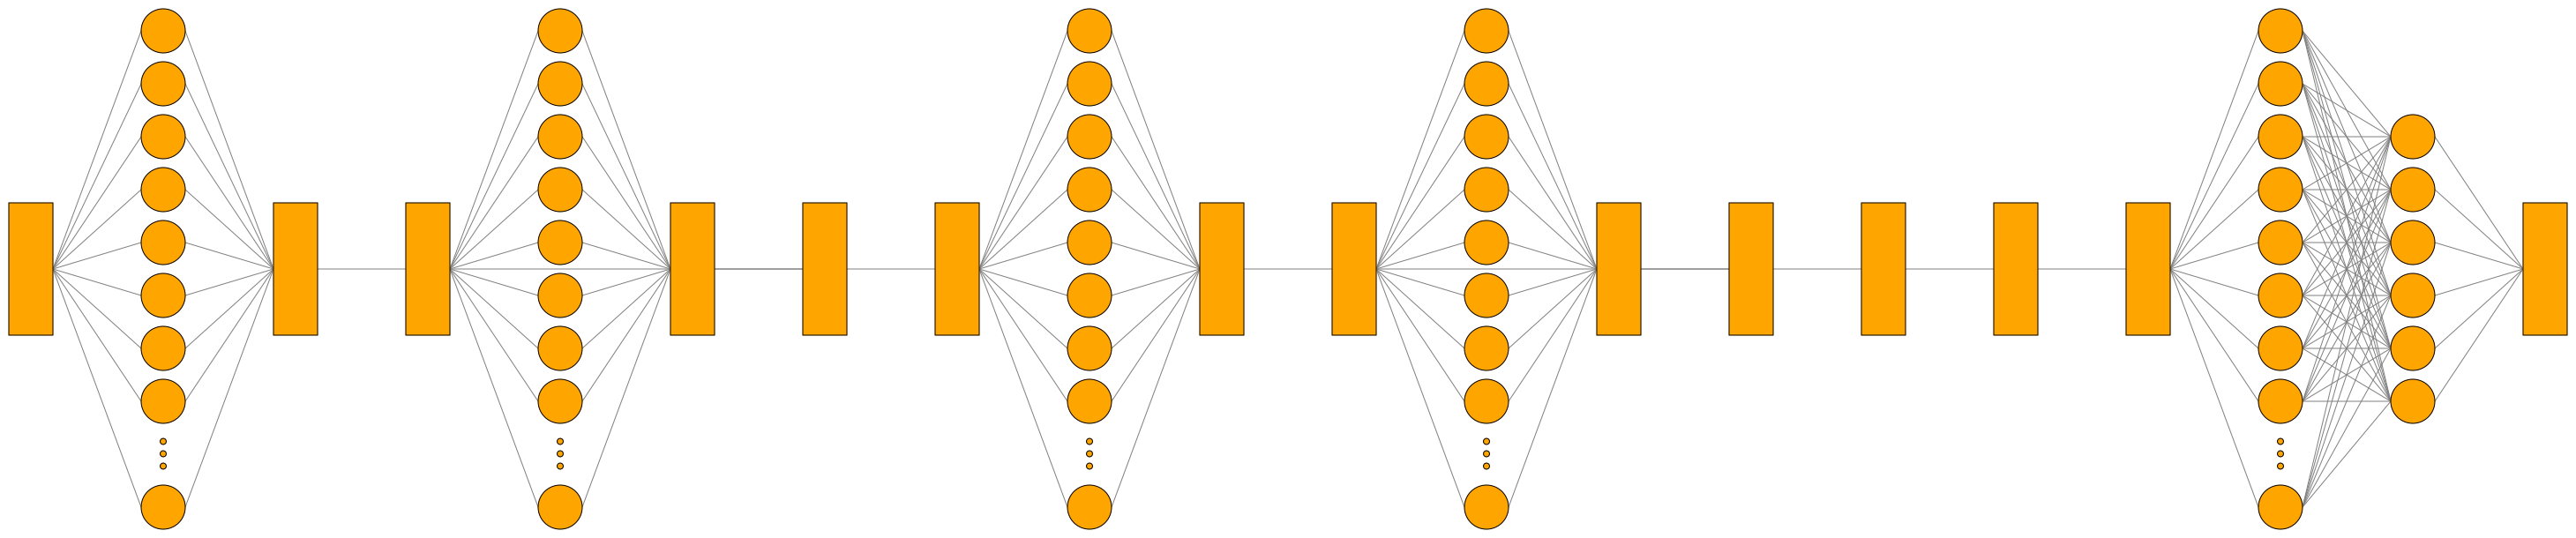

In [24]:
#model.add(visualkeras.SpacingDummyLayer(spacing=100))
visualkeras.graph_view(model,layer_spacing=100,show_neurons=True)

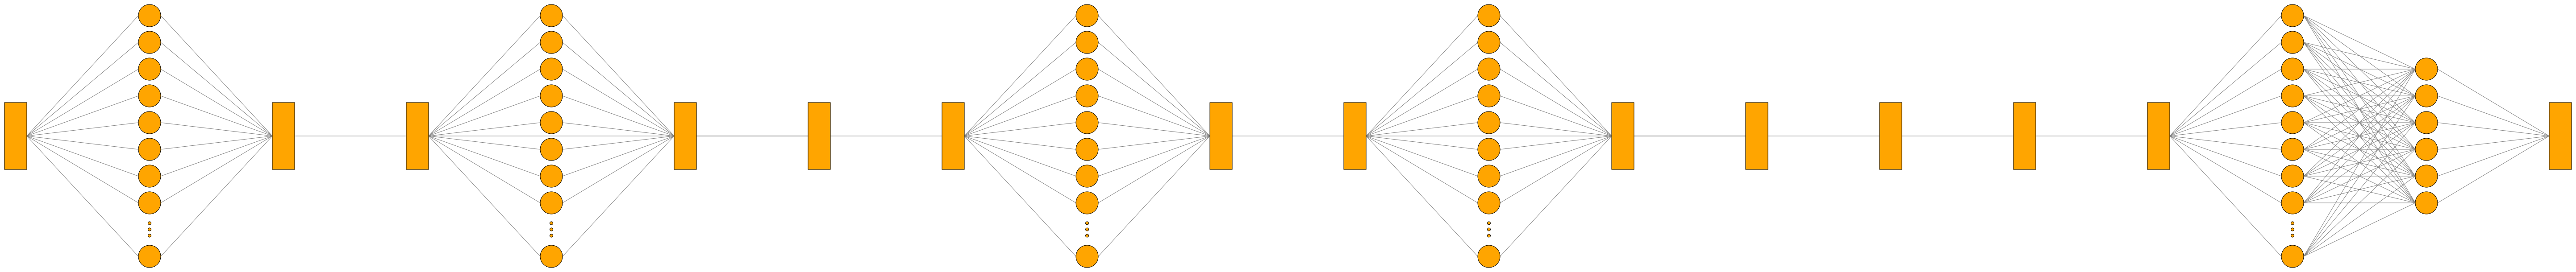

In [30]:
visualkeras.graph_view(model)

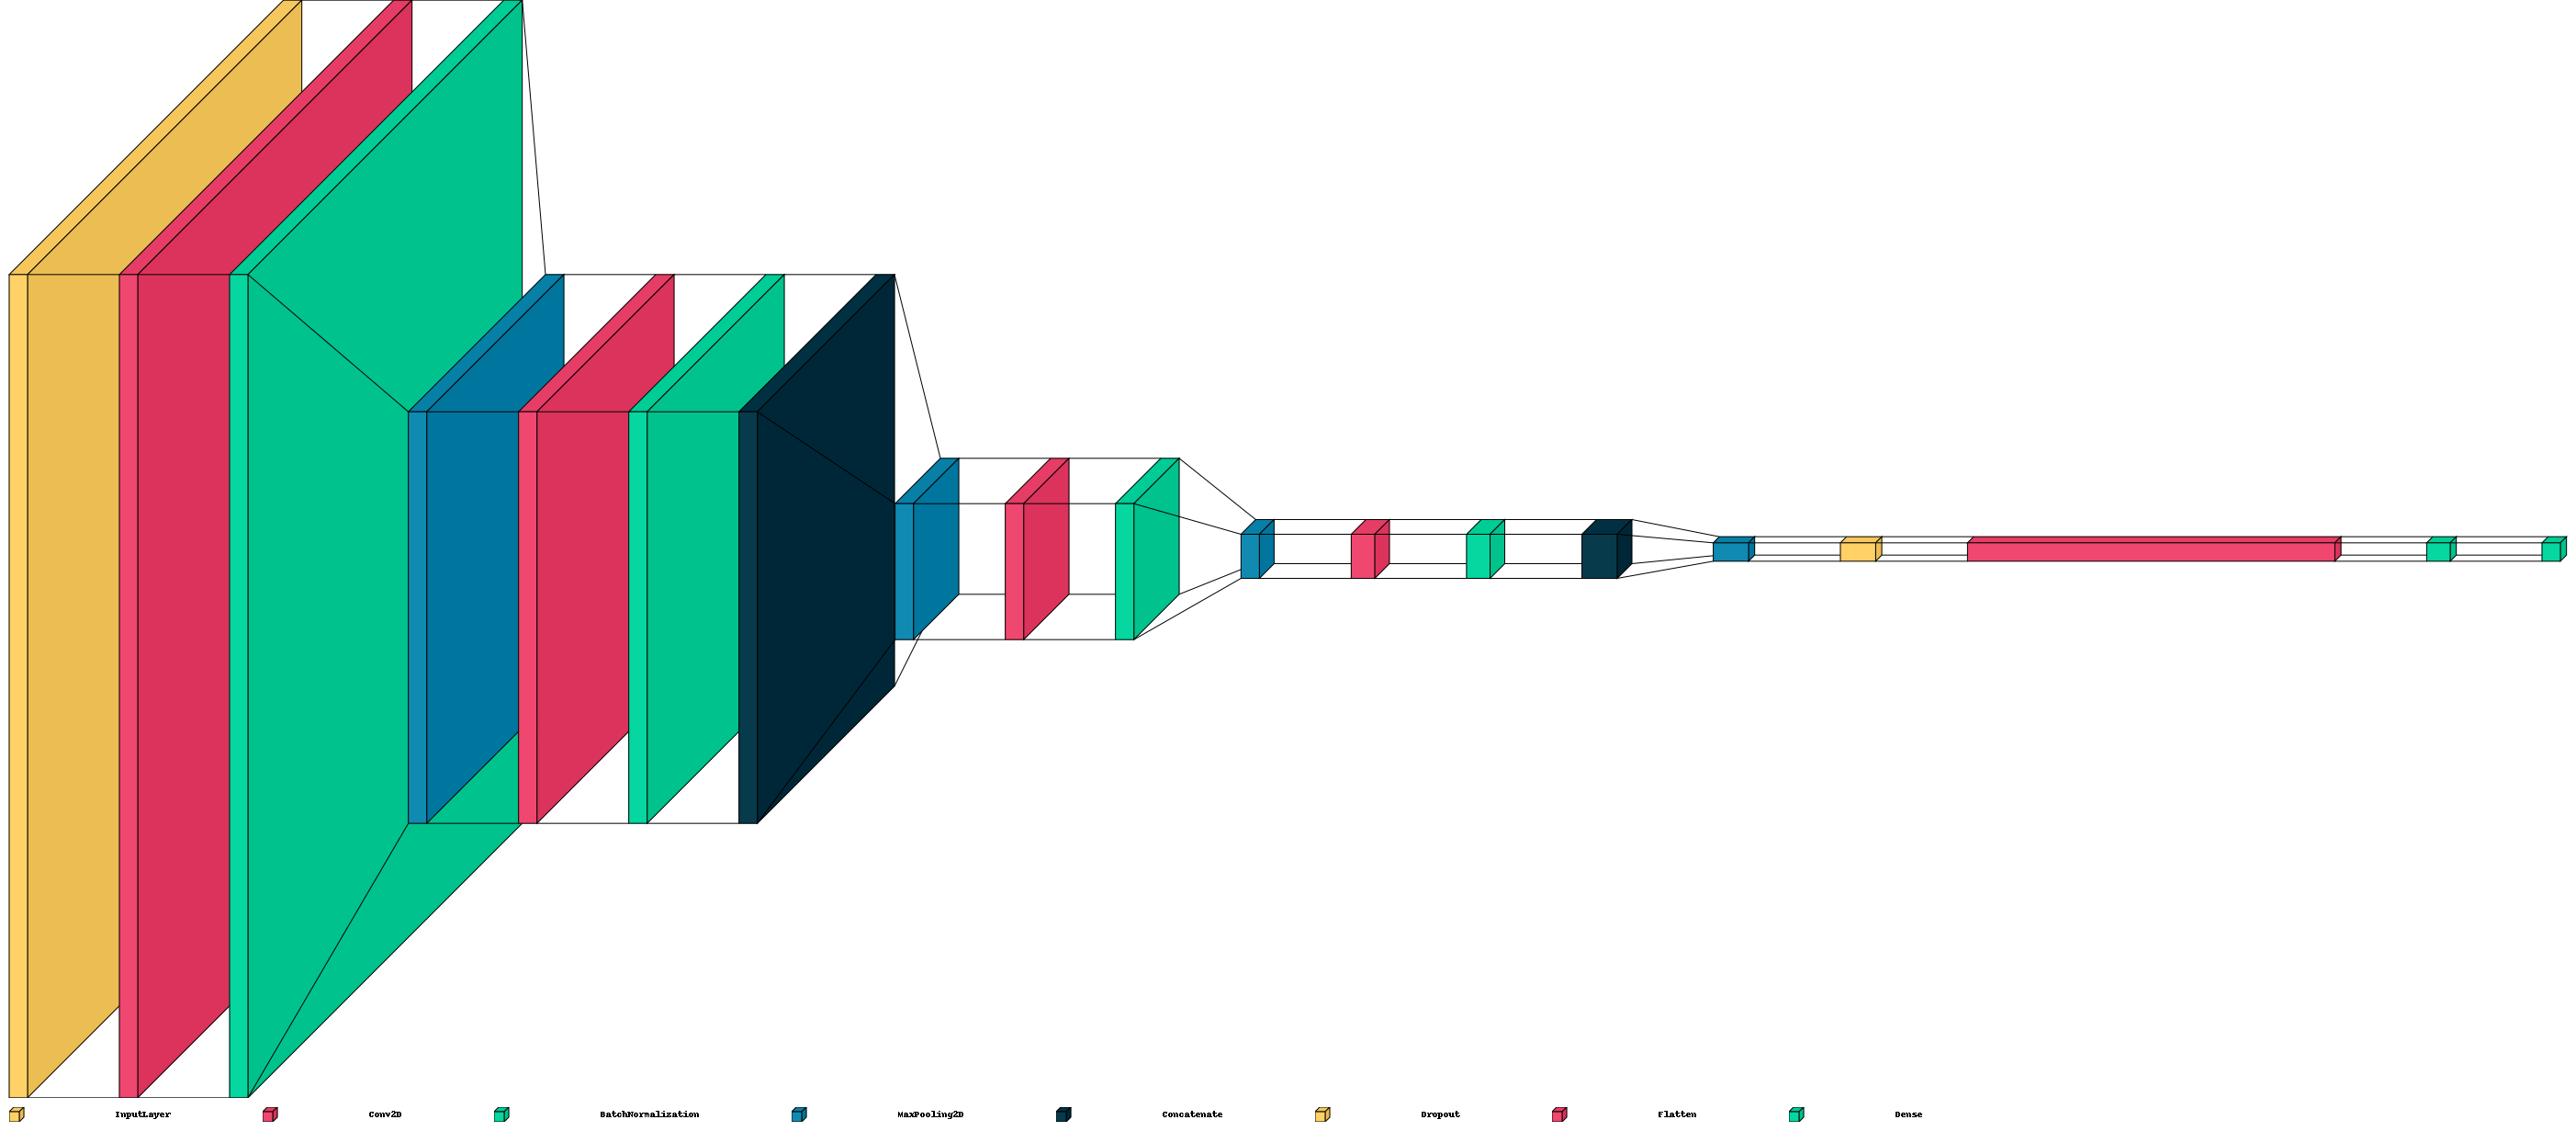

In [36]:
visualkeras.layered_view(model,legend=True,spacing=100)

## Custom Color Map
it is possible to provide a custom color map for fill and outline per layer type

In [31]:
from collections import defaultdict

In [25]:
dict=[]

In [32]:
color_map=defaultdict()

In [33]:
color_map['Conv2D']['fill']='orange'
color_map['MaxPooling2D']['fill']='gray'
color_map['Dense']['fill']='green'
color_map['Dropout']['fill']='pink'
color_map['Flatten']['fill']='teal'

KeyError: 'Conv2D'

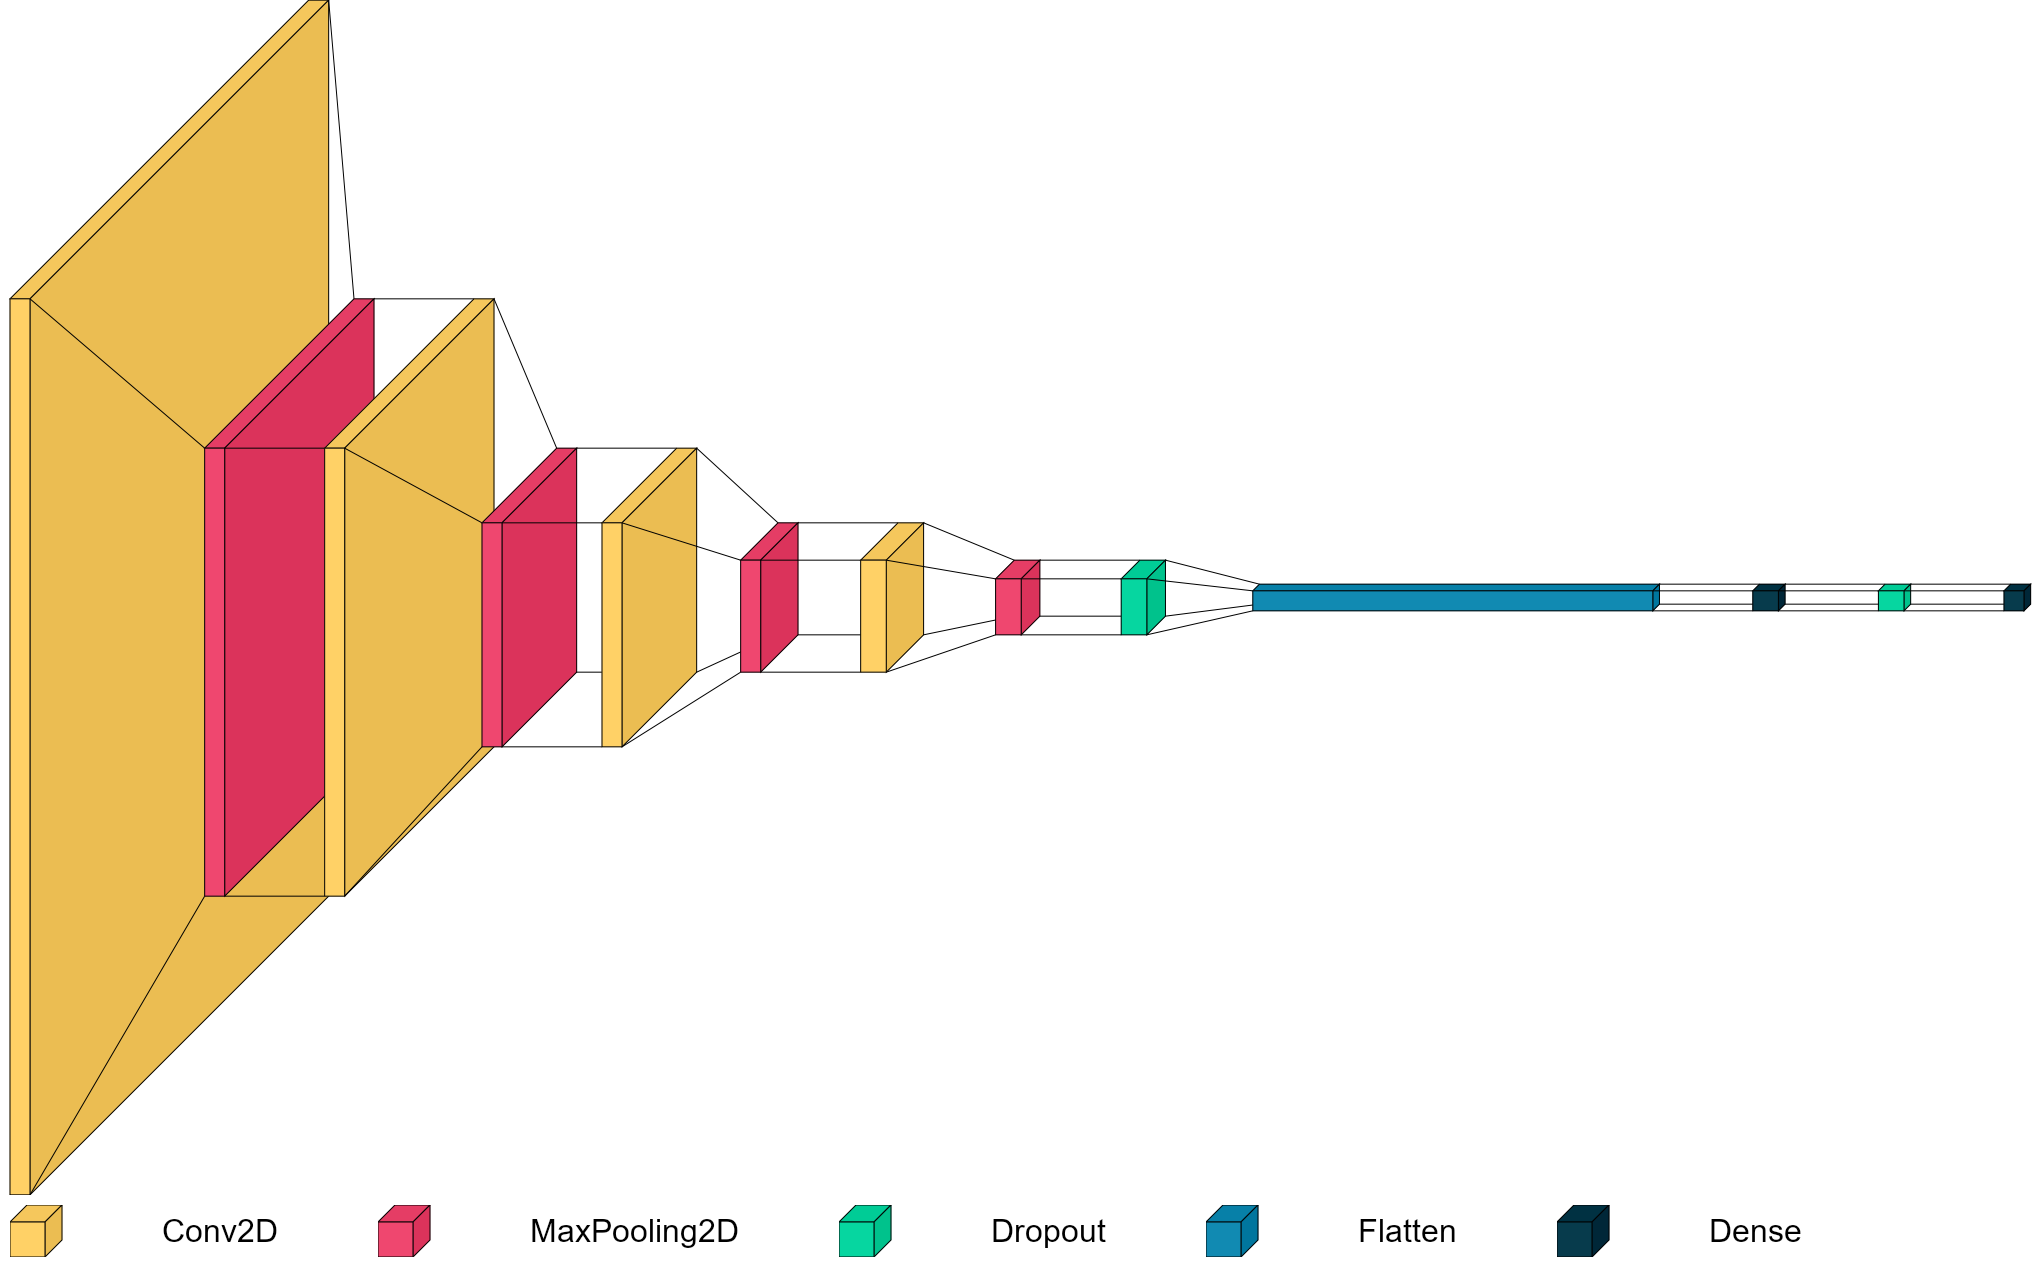

In [22]:
visualkeras.layered_view(model,color_map=color_map,spacing=100,legend=True,font=font)

## Scaling Dimension

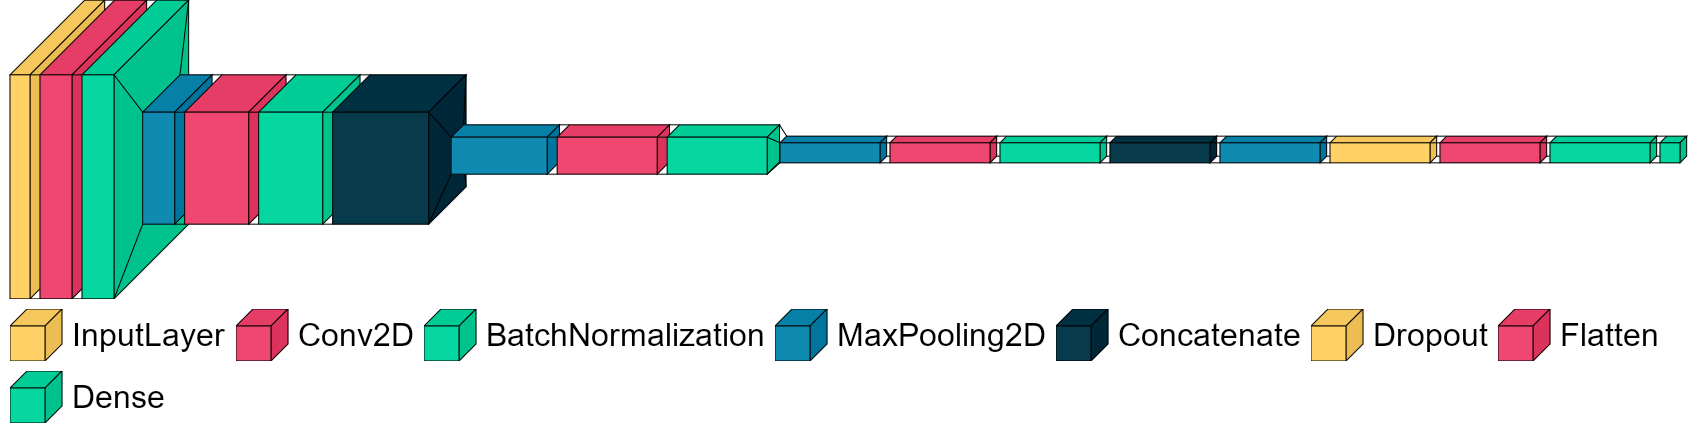

In [27]:
visualkeras.graph_view(model,
                         to_file='scaling_hyrbid_cnn.png',
                         scale_xy=1,
                         scale_z=1,
                         max_z=100,
                        spacing=10,
                         legend=True,
                         font=font
                        )